In [2]:
import pandas as pd
import numpy as np

In [3]:
car_prices_df = pd.read_csv('car_prices_fixed.csv')
car_prices_df = car_prices_df.dropna()
print(car_prices_df.head())

#different body styles/colors

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca        4.5    1331.0   gray    black   
3  yv1612tb4f1310987    ca        4.1   14282.0  white    black   
4  wba6b2c57ed129731    ca        4.3    2641.0   gray    black   

                                   seller    mmr  sellingprice  \
0                 kia motors america, inc  20500         21500   
1                 kia motors america, 

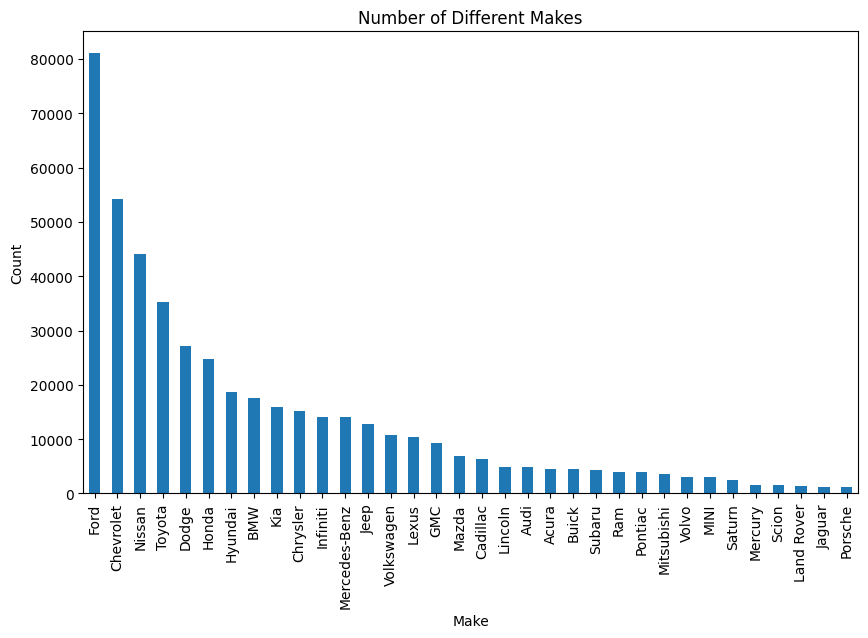

In [3]:
import matplotlib.pyplot as plt

# Count the occurrences of each make
make_counts = car_prices_df['make'].value_counts()

make_counts = make_counts[make_counts >= 1000]

# Plot the result
make_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Different Makes')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()

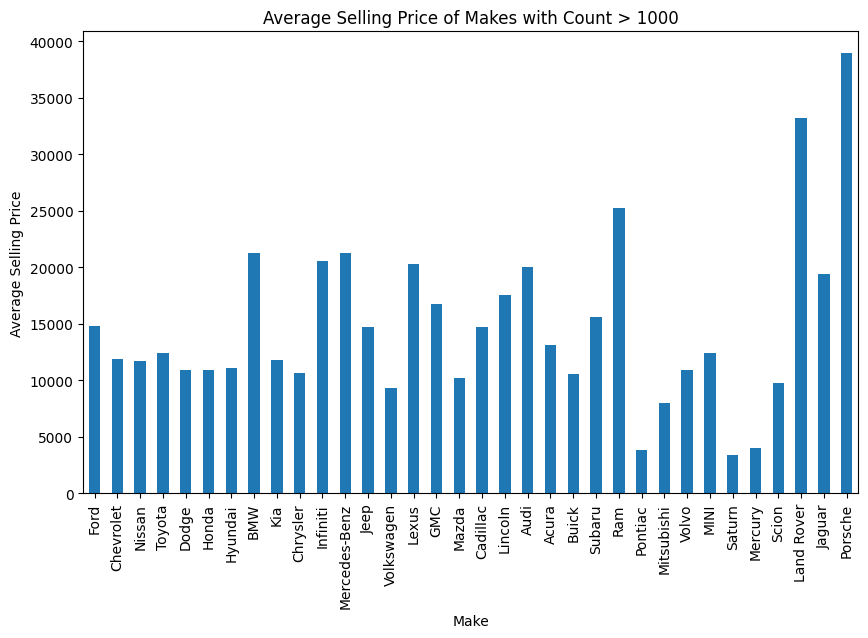

In [4]:
# Filter the dataframe to include only makes with count > 1000
filtered_df = car_prices_df[car_prices_df['make'].isin(make_counts.index)]

# Calculate the average selling price for each make
average_price = filtered_df.groupby('make')['sellingprice'].mean()

# Filter the average price to include only makes with count > 1000
average_price = average_price[make_counts.index]

# Plot the result
plt.figure(figsize=(10, 6))
average_price.plot(kind='bar')
plt.title('Average Selling Price of Makes with Count > 1000')
plt.xlabel('Make')
plt.ylabel('Average Selling Price')
plt.show()

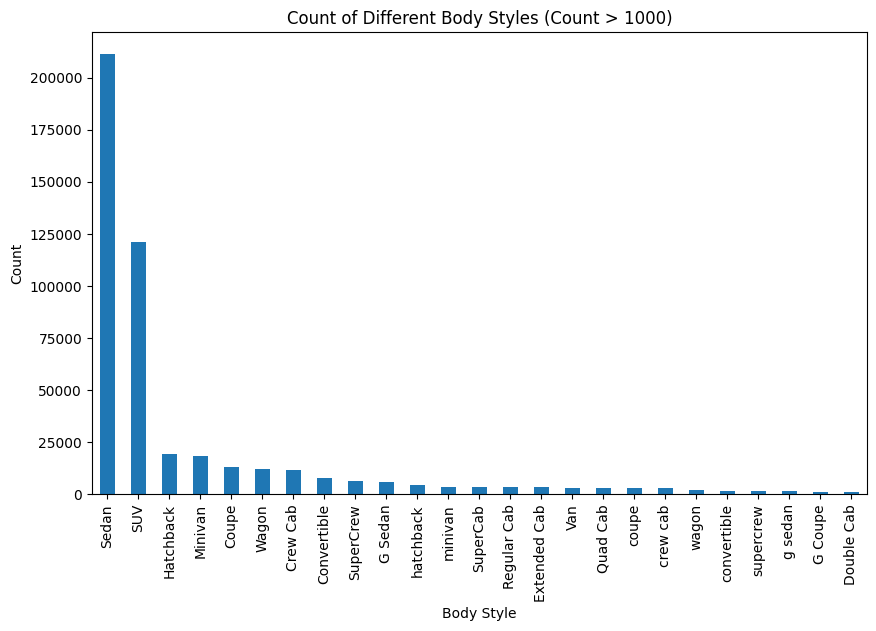

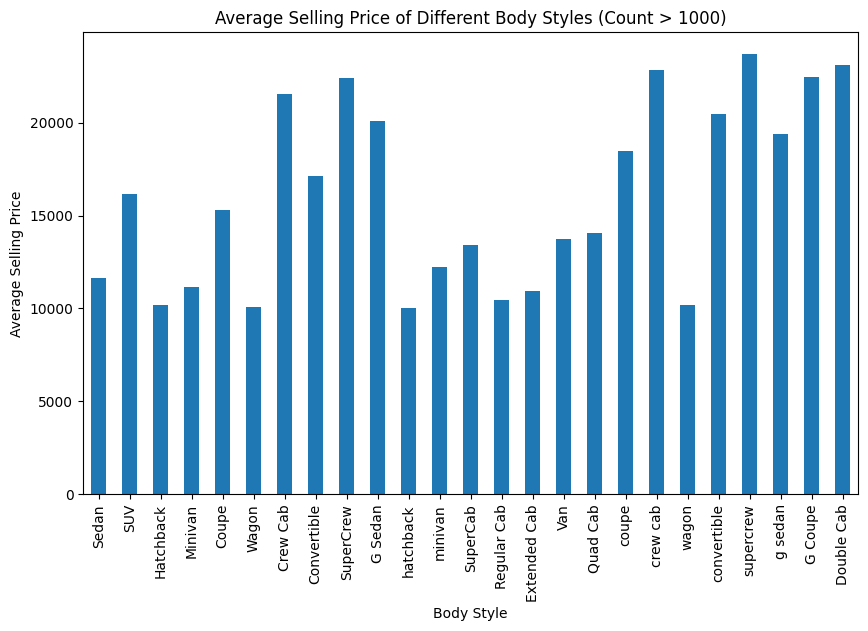

In [5]:
# Count the occurrences of each body style
body_style_counts = car_prices_df['body'].value_counts()

# Filter to include only body styles with count > 1000
body_style_counts = body_style_counts[body_style_counts > 1000]

# Merge body styles "SUV" and "suv", "Sedan" and "sedan"
car_prices_df['body'] = car_prices_df['body'].replace({'suv': 'SUV', 'sedan': 'Sedan'})
body_style_counts = car_prices_df['body'].value_counts()
body_style_counts = body_style_counts[body_style_counts > 1000]

# Calculate the average selling price for each body style
average_body_style_price = car_prices_df[car_prices_df['body'].isin(body_style_counts.index)].groupby('body')['sellingprice'].mean()

# Plot the count of different body styles
plt.figure(figsize=(10, 6))
body_style_counts.plot(kind='bar')
plt.title('Count of Different Body Styles (Count > 1000)')
plt.xlabel('Body Style')
plt.ylabel('Count')
plt.show()

# Sort the average selling price by count of body styles
average_body_style_price = average_body_style_price.loc[body_style_counts.index]

# Plot the average selling price of different body styles
plt.figure(figsize=(10, 6))
average_body_style_price.plot(kind='bar')
plt.title('Average Selling Price of Different Body Styles (Count > 1000)')
plt.xlabel('Body Style')
plt.ylabel('Average Selling Price')
plt.show()

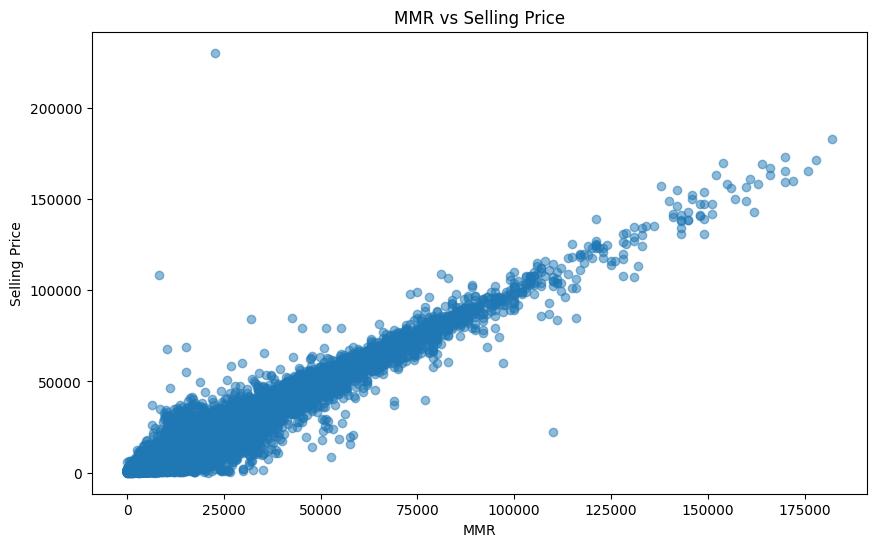

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['mmr'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('MMR vs Selling Price')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.show()
## outlier

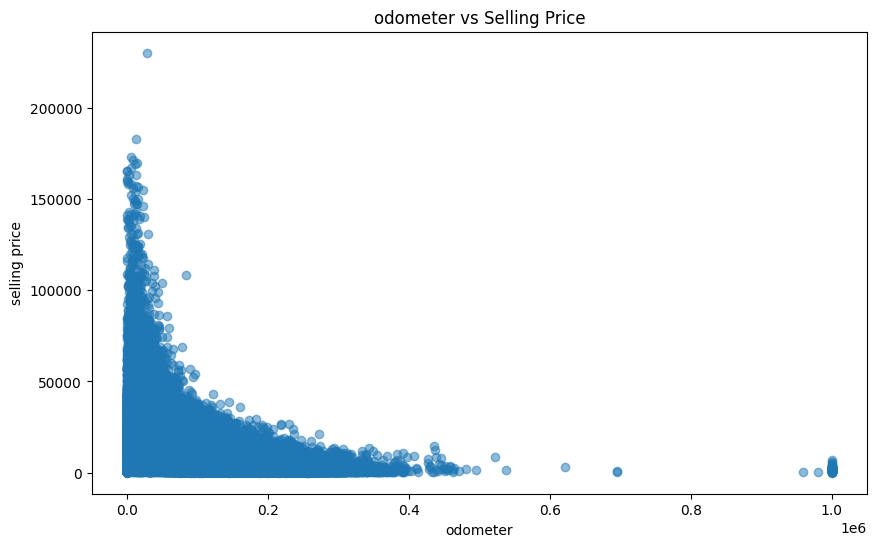

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['odometer'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('odometer vs Selling Price')
plt.xlabel('odometer')
plt.ylabel('selling price')
plt.show()

Mean Squared Error: 61943435.40382226
R² Score: 0.3321121810906944


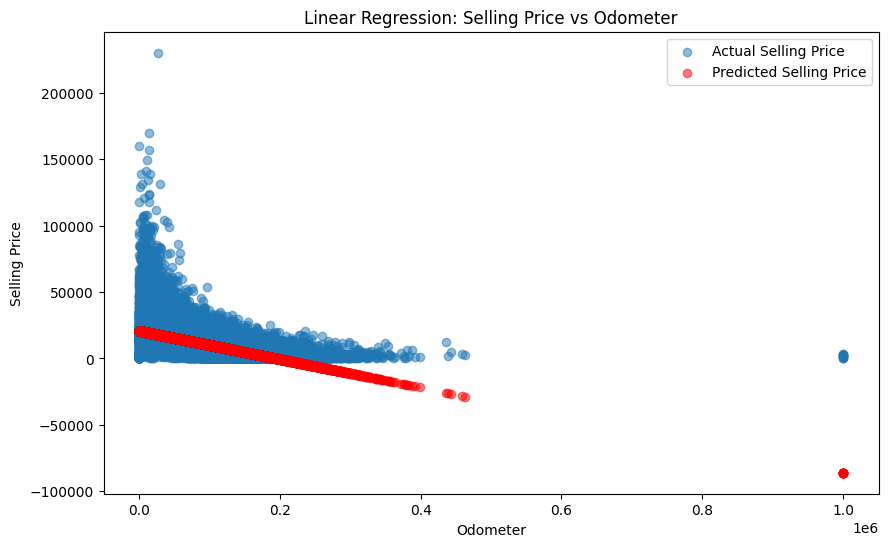

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

# Prepare the data
X = car_prices_df[['odometer']]
y = car_prices_df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, alpha=0.5, label='Actual Selling Price')
plt.scatter(X_test, y_pred, alpha=0.5, label='Predicted Selling Price', color='red')
plt.title('Linear Regression: Selling Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


Mean Squared Error: 49216605.97054324
R² Score: 0.314903468604636


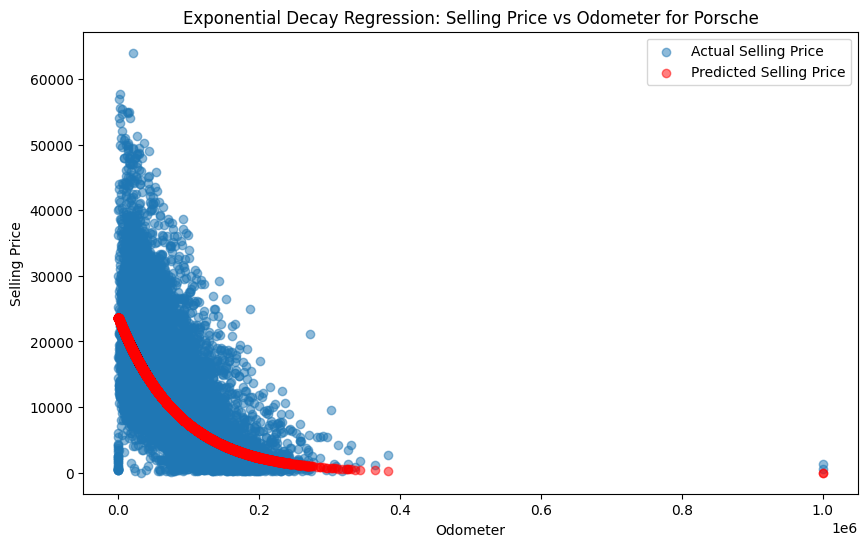

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Filter the dataframe to include only rows where make is 'Porsche'
ford_df = car_prices_df[car_prices_df['make'] == 'Ford']

# Prepare the data
X = ford_df[['odometer']]
y = ford_df['sellingprice']  # Selling price as the target for regression
actual_prices = ford_df['sellingprice']  # Keep original prices for visualization

# Transform the target variable to fit an exponential model
y_log = np.log(y)  # Take the natural log of selling prices

# Split the data into training and testing sets
X_train, X_test, y_train_log, y_test_log, prices_train, prices_test = train_test_split(
    X, y_log, actual_prices, test_size=0.2, random_state=42
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model on the transformed target
exp_reg = LinearRegression()
exp_reg.fit(X_train_scaled, y_train_log)

# Make predictions on the log-transformed scale
y_pred_log = exp_reg.predict(X_test_scaled)

# Transform predictions back to the original scale (exponential)
y_pred = np.exp(y_pred_log)

# Evaluate the model
mse = mean_squared_error(prices_test, y_pred)
r2 = r2_score(prices_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the actual selling prices and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test['odometer'], prices_test, alpha=0.5, label='Actual Selling Price')
plt.scatter(X_test['odometer'], y_pred, alpha=0.5, label='Predicted Selling Price', color='red')
plt.title('Exponential Decay Regression: Selling Price vs Odometer for Porsche')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


Mean Squared Error: 217384081.43755734
R² Score: 0.6160155685513339


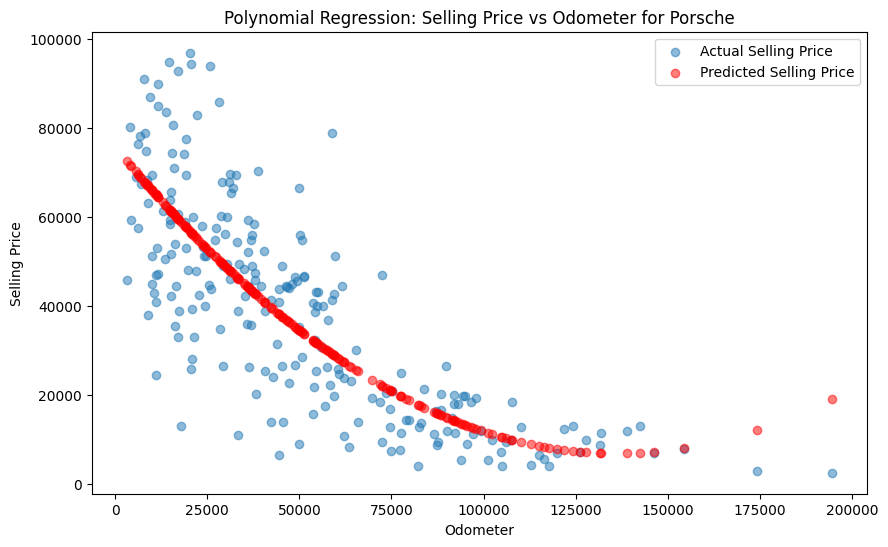

In [10]:
# Filter the dataframe to include only rows where make is 'Porsche'
porsche_df = car_prices_df[car_prices_df['make'] == 'Porsche']

# Prepare the data
X = porsche_df[['odometer']]
y = porsche_df['sellingprice']  # Selling price as the target for regression
actual_prices = porsche_df['sellingprice']  # Keep original prices for visualization

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, prices_train, prices_test = train_test_split(
    X, y, actual_prices, test_size=0.2, random_state=42
)

# Apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Degree can be adjusted
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Train a linear regression model on the polynomial features
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_scaled, y_train)

# Make predictions
y_pred = poly_reg.predict(X_test_poly_scaled)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Plot the actual selling prices and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test['odometer'], prices_test, alpha=0.5, label='Actual Selling Price')
plt.scatter(X_test['odometer'], y_pred, alpha=0.5, label='Predicted Selling Price', color='red')
plt.title('Polynomial Regression: Selling Price vs Odometer for Porsche')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


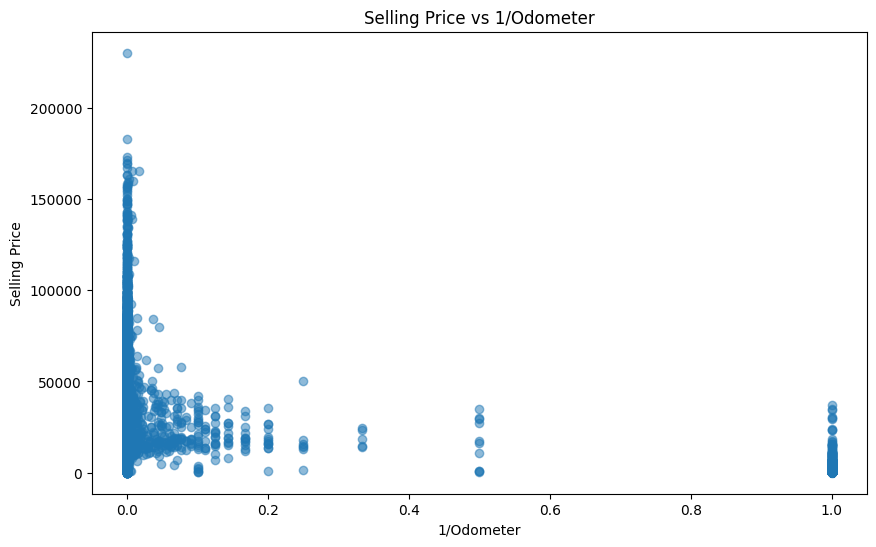

In [11]:
# Calculate the inverse of the odometer
car_prices_df['inverse_odometer'] = 1 / car_prices_df['odometer']

# Plot the result
plt.figure(figsize=(10, 6))
plt.scatter(car_prices_df['inverse_odometer'], car_prices_df['sellingprice'], alpha=0.5)
plt.title('Selling Price vs 1/Odometer')
plt.xlabel('1/Odometer')
plt.ylabel('Selling Price')
plt.show()

C:\Users\ericy\AppData\Local\Temp\ipykernel_6508\3055309788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['inverse_odometer'] = 1 / X['odometer']


Coefficients: [-10902.80312437]
Intercept: 13714.278225670856
R^2 score: 0.0028826619541396648


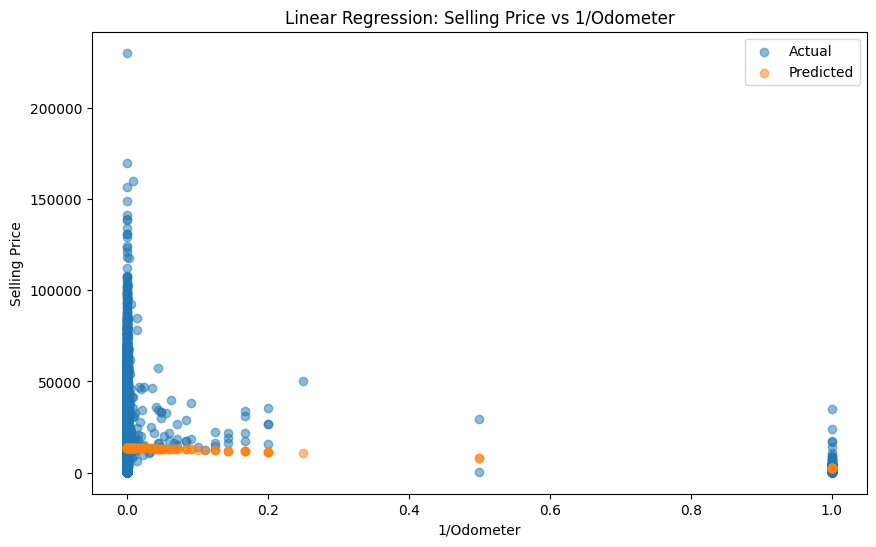

In [12]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = car_prices_df[['odometer']]
y = car_prices_df['sellingprice']

# Calculate the inverse of the odometer
X['inverse_odometer'] = 1 / X['odometer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[['inverse_odometer']], y, test_size=0.2, random_state=42)

# Create and train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X_test, y_test)}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['inverse_odometer'], y_test, alpha=0.5, label='Actual')
plt.scatter(X_test['inverse_odometer'], y_pred, alpha=0.5, label='Predicted')
plt.title('Linear Regression: Selling Price vs 1/Odometer')
plt.xlabel('1/Odometer')
plt.ylabel('Selling Price')
plt.legend()
plt.show()

In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from torch.utils.data import Dataset, DataLoader

# Load your dataframe (example provided here)
# df = pd.read_csv('your_dataset.csv')
df = car_prices_df

# Drop unused columns
df = df.drop(['mmr', 'sellingprice', 'vin', 'saledate'], axis=1)

# Handle categorical columns using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].fillna("NA"))
    label_encoders[col] = le

# Handle numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(0)

# Separate features and target
X = df
y = car_prices_df['sellingprice']  # Replace YOUR_DATAFRAME_HERE

# Standardize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# PyTorch Dataset
class CarDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create datasets and data loaders
train_dataset = CarDataset(X_train, y_train)
test_dataset = CarDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
# More complex neural network
class LargerNeuralNet(nn.Module):
    def __init__(self, input_size):
        super(LargerNeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = nn.functional.leaky_relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = nn.functional.leaky_relu(self.bn3(self.fc3(x)))
        x = self.fc4(x)
        return x

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model, loss function, and optimizer
input_size = X_train.shape[1]
model = NeuralNet(input_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader):.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    y_pred = []
    y_true = []
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch).squeeze()
        y_pred.extend(outputs.cpu().numpy())
        y_true.extend(y_batch.cpu().numpy())

# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f"Test RMSE: {rmse:.2f}")


Epoch [1/50], Loss: 57073978.3721
Epoch [2/50], Loss: 45430970.7961
Epoch [3/50], Loss: 43036826.9445
Epoch [4/50], Loss: 42108430.9857
Epoch [5/50], Loss: 41278854.0914
Epoch [6/50], Loss: 40358226.7232
Epoch [7/50], Loss: 39383086.7371
Epoch [8/50], Loss: 38375695.8080
Epoch [9/50], Loss: 37380045.7432
Epoch [10/50], Loss: 36443515.6479
Epoch [11/50], Loss: 35557514.7143
Epoch [12/50], Loss: 34676871.9671
Epoch [13/50], Loss: 33813535.2166
Epoch [14/50], Loss: 33156362.4543
Epoch [15/50], Loss: 32604173.6750
Epoch [16/50], Loss: 32106739.1247
Epoch [17/50], Loss: 31643515.1642
Epoch [18/50], Loss: 31206210.2314
Epoch [19/50], Loss: 30762593.8983
Epoch [20/50], Loss: 30357435.8964
Epoch [21/50], Loss: 29979775.6425
Epoch [22/50], Loss: 29641022.2002
Epoch [23/50], Loss: 29314851.5164
Epoch [24/50], Loss: 28979537.3149
Epoch [25/50], Loss: 28667244.8660
Epoch [26/50], Loss: 28362670.9244
Epoch [27/50], Loss: 28072594.1179
Epoch [28/50], Loss: 27780711.3842
Epoch [29/50], Loss: 27502283

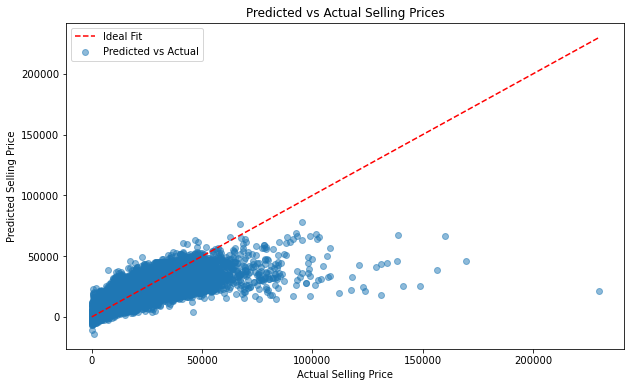

In [6]:
import matplotlib.pyplot as plt

# Plot the actual selling prices and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

In [7]:
# Remove car prices higher than 100000
filtered_car_prices_df = car_prices_df[car_prices_df['sellingprice'] <= 100000]

# Drop unused columns
filtered_df = filtered_car_prices_df.drop(['mmr', 'sellingprice', 'vin', 'saledate'], axis=1)

# Handle categorical columns using Label Encoding
categorical_cols = filtered_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = label_encoders[col]
    filtered_df[col] = le.transform(filtered_df[col].fillna("NA"))

# Handle numerical columns
numerical_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns
filtered_df[numerical_cols] = filtered_df[numerical_cols].fillna(0)

# Separate features and target
X_filtered = filtered_df
y_filtered = filtered_car_prices_df['sellingprice']

# Standardize numerical features
X_filtered = scaler.transform(X_filtered)

# Train-test split
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Create datasets and data loaders
train_dataset_filtered = CarDataset(X_train_filtered, y_train_filtered)
test_dataset_filtered = CarDataset(X_test_filtered, y_test_filtered)
train_loader_filtered = DataLoader(train_dataset_filtered, batch_size=32, shuffle=True)
test_loader_filtered = DataLoader(test_dataset_filtered, batch_size=32, shuffle=False)

# Initialize the model, loss function, and optimizer
model_filtered = NeuralNet(input_size).to(device)
criterion_filtered = nn.MSELoss()
optimizer_filtered = torch.optim.Adam(model_filtered.parameters(), lr=0.001)

# Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model_filtered.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader_filtered:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model_filtered(X_batch).squeeze()
        loss = criterion_filtered(outputs, y_batch)

        # Backward pass
        optimizer_filtered.zero_grad()
        loss.backward()
        optimizer_filtered.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader_filtered):.4f}")

# Evaluation
model_filtered.eval()
with torch.no_grad():
    y_pred_filtered = []
    y_true_filtered = []
    for X_batch, y_batch in test_loader_filtered:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model_filtered(X_batch).squeeze()
        y_pred_filtered.extend(outputs.cpu().numpy())
        y_true_filtered.extend(y_batch.cpu().numpy())



Epoch [1/50], Loss: 53932694.7488
Epoch [2/50], Loss: 43053395.2706
Epoch [3/50], Loss: 40388228.6184
Epoch [4/50], Loss: 39363293.0208
Epoch [5/50], Loss: 38672342.4805
Epoch [6/50], Loss: 38010686.3237
Epoch [7/50], Loss: 37291868.1339
Epoch [8/50], Loss: 36194434.3562
Epoch [9/50], Loss: 34931724.2643
Epoch [10/50], Loss: 33739360.2192
Epoch [11/50], Loss: 32677387.0216
Epoch [12/50], Loss: 31714594.6188
Epoch [13/50], Loss: 30804133.8695
Epoch [14/50], Loss: 29938567.0390
Epoch [15/50], Loss: 29146297.5477
Epoch [16/50], Loss: 28430601.4143
Epoch [17/50], Loss: 27797063.6932
Epoch [18/50], Loss: 27237154.0135
Epoch [19/50], Loss: 26772726.8183
Epoch [20/50], Loss: 26361733.6955
Epoch [21/50], Loss: 26001215.6851
Epoch [22/50], Loss: 25672516.7634
Epoch [23/50], Loss: 25352392.4974
Epoch [24/50], Loss: 25082357.3608
Epoch [25/50], Loss: 24844388.3704
Epoch [26/50], Loss: 24579647.0564
Epoch [27/50], Loss: 24351848.9913
Epoch [28/50], Loss: 24109513.1813
Epoch [29/50], Loss: 23851551

In [8]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse_filtered = np.sqrt(mean_squared_error(y_true_filtered, y_pred_filtered))
print(f"Test RMSE: {rmse_filtered:.2f}")

Test RMSE: 4541.56


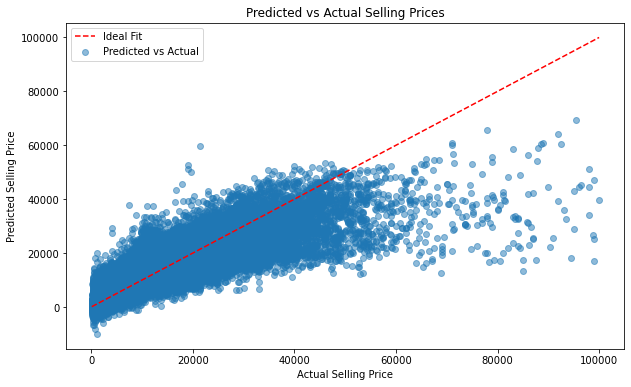

In [9]:
# Plot the actual selling prices and predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_true_filtered, y_pred_filtered, alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_true_filtered), max(y_true_filtered)], [min(y_true_filtered), max(y_true_filtered)], color='red', linestyle='--', label='Ideal Fit')
plt.title('Predicted vs Actual Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.legend()
plt.show()

Epoch [1/50], Loss: 0.4663
Epoch [2/50], Loss: 0.1761
Epoch [3/50], Loss: 0.1581
Epoch [4/50], Loss: 0.1441
Epoch [5/50], Loss: 0.1322
Epoch [6/50], Loss: 0.1249
Epoch [7/50], Loss: 0.1192
Epoch [8/50], Loss: 0.1156
Epoch [9/50], Loss: 0.1128
Epoch [10/50], Loss: 0.1104
Epoch [11/50], Loss: 0.1082
Epoch [12/50], Loss: 0.1060
Epoch [13/50], Loss: 0.1044
Epoch [14/50], Loss: 0.1027
Epoch [15/50], Loss: 0.1015
Epoch [16/50], Loss: 0.1003
Epoch [17/50], Loss: 0.0995
Epoch [18/50], Loss: 0.0983
Epoch [19/50], Loss: 0.0972
Epoch [20/50], Loss: 0.0961
Epoch [21/50], Loss: 0.0952
Epoch [22/50], Loss: 0.0944
Epoch [23/50], Loss: 0.0936
Epoch [24/50], Loss: 0.0930
Epoch [25/50], Loss: 0.0922
Epoch [26/50], Loss: 0.0915
Epoch [27/50], Loss: 0.0907
Epoch [28/50], Loss: 0.0903
Epoch [29/50], Loss: 0.0896
Epoch [30/50], Loss: 0.0892
Epoch [31/50], Loss: 0.0884
Epoch [32/50], Loss: 0.0879
Epoch [33/50], Loss: 0.0874
Epoch [34/50], Loss: 0.0871
Epoch [35/50], Loss: 0.0867
Epoch [36/50], Loss: 0.0862
E

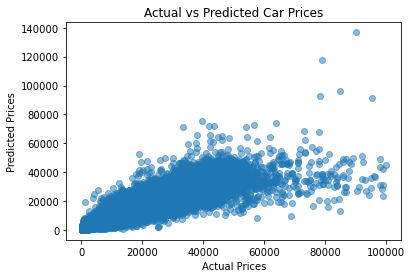

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Step 1: Filter car prices and prepare data
filtered_car_prices_df = car_prices_df[car_prices_df['sellingprice'] <= 100000]

# Drop unused columns
filtered_df = filtered_car_prices_df.drop(['mmr', 'sellingprice', 'vin', 'saledate'], axis=1)

# Handle categorical columns using Label Encoding
categorical_cols = filtered_df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = label_encoders[col]
    filtered_df[col] = le.transform(filtered_df[col].fillna("NA"))

# Handle numerical columns
numerical_cols = filtered_df.select_dtypes(include=['float64', 'int64']).columns
filtered_df[numerical_cols] = filtered_df[numerical_cols].fillna(0)

# Separate features and log-transformed target
X_filtered = filtered_df
y_filtered = np.log(filtered_car_prices_df['sellingprice'])  # Log-transform the target variable

# Standardize numerical features
X_filtered = scaler.transform(X_filtered)

# Step 2: Train-test split
from sklearn.model_selection import train_test_split

X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Step 3: Create datasets and data loaders
train_dataset_filtered = CarDataset(X_train_filtered, y_train_filtered)
test_dataset_filtered = CarDataset(X_test_filtered, y_test_filtered)
train_loader_filtered = DataLoader(train_dataset_filtered, batch_size=32, shuffle=True)
test_loader_filtered = DataLoader(test_dataset_filtered, batch_size=32, shuffle=False)

# Step 4: Initialize the model, loss function, and optimizer
model_filtered = NeuralNet(input_size).to(device)
criterion_filtered = nn.MSELoss()  # Still use MSELoss because the target is now in log scale
optimizer_filtered = torch.optim.Adam(model_filtered.parameters(), lr=0.001)

# Step 5: Training loop
num_epochs = 50
for epoch in range(num_epochs):
    model_filtered.train()
    train_loss = 0.0
    for X_batch, y_batch in train_loader_filtered:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        # Forward pass
        outputs = model_filtered(X_batch).squeeze()
        loss = criterion_filtered(outputs, y_batch)

        # Backward pass
        optimizer_filtered.zero_grad()
        loss.backward()
        optimizer_filtered.step()

        train_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader_filtered):.4f}")

# Step 6: Evaluation
model_filtered.eval()
with torch.no_grad():
    y_pred_filtered = []
    y_true_filtered = []
    for X_batch, y_batch in test_loader_filtered:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model_filtered(X_batch).squeeze()

        # Back-transform predictions and actual values to original price scale
        y_pred_filtered.extend(np.exp(outputs.cpu().numpy()))
        y_true_filtered.extend(np.exp(y_batch.cpu().numpy()))

# Step 7: Calculate RMSE in the original scale
rmse = np.sqrt(mean_squared_error(y_true_filtered, y_pred_filtered))
print(f"RMSE: {rmse:.2f}")

# Step 8: Visualization of Predictions
plt.scatter(y_true_filtered, y_pred_filtered, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.show()
